### Exploratory Data Analysis : Segment the dataset and draw unique insights, including visualisation of the transaction volume and assessing the effect of any outliers.

<font color=green> <b> Used Pandas to segregate customer data by each month and used Matplotlib to visualise transaction volume and mean transaction amount each day. Also visualised top 5 customer transacting from POS and SALES-POS and the State with maximum Transaction. And compare their monthly avg salary, balance.

In [1]:
# Importing the Libraries

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#from pandas_profiling import ProfileReport
import datetime
%matplotlib inline

In [2]:
# Importing the Data Set
anz = pd.read_excel("ANZ synthesised transaction dataset.xlsx")

<font color=blue> <b> Checking the basic Information.
- Data Head: To check the type of Data
- Data Info: to check the attributes types, and Null Values
- Describe: To check the mean, range, quartiles, a Std.Dev

In [3]:
anz.head(5)

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,...,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,...,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,...,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,...,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit
3,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,...,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit
4,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,...,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit


In [4]:
anz.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12043 entries, 0 to 12042
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   status             12043 non-null  object        
 1   card_present_flag  7717 non-null   float64       
 2   bpay_biller_code   885 non-null    object        
 3   account            12043 non-null  object        
 4   currency           12043 non-null  object        
 5   long_lat           12043 non-null  object        
 6   txn_description    12043 non-null  object        
 7   merchant_id        7717 non-null   object        
 8   merchant_code      883 non-null    float64       
 9   first_name         12043 non-null  object        
 10  balance            12043 non-null  float64       
 11  date               12043 non-null  datetime64[ns]
 12  gender             12043 non-null  object        
 13  age                12043 non-null  int64         
 14  mercha

In [5]:
anz.describe()

,card_present_flag,merchant_code,balance,age,amount
count,7717.000000,883.0,12043.000000,12043.000000,12043.000000
mean,0.802644,0.0,14704.195553,30.582330,187.933588
std,0.398029,0.0,31503.722652,10.046343,592.599934
min,0.000000,0.0,0.240000,18.000000,0.100000
25%,1.000000,0.0,3158.585000,22.000000,16.000000
50%,1.000000,0.0,6432.010000,28.000000,29.000000
75%,1.000000,0.0,12465.945000,38.000000,53.655000
max,1.000000,0.0,267128.520000,78.000000,8835.980000


<font color=blue> <b> Generating Details for each Variables using Pandas Profiler

In [7]:
#profile = ProfileReport(anz,title= 'Report',explorative = True)
#profile.to_file('ANZ EDA Details.html')

<font color=blue> <b> Creating Missing Value Function

In [6]:
def missing_values_table(anz):
        mis_val = anz.isnull().sum()
        mis_val_percent = 100 * anz.isnull().sum() / len(anz)
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        mis_val_table_ren_columns = mis_val_table.rename(columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        mis_val_table_ren_columns = mis_val_table_ren_columns[mis_val_table_ren_columns.iloc[:,1] != 0].sort_values('% of Total Values', ascending=False).round(1)
        print ("Your selected dataframe has " + str(anz.shape[1]))   
        print("There are " + str(mis_val_table_ren_columns.shape[0])+" columns that have missing values.")
        return mis_val_table_ren_columns
missing_values_table(anz).style.background_gradient(cmap='vlag_r')


Your selected dataframe has 23
There are 7 columns that have missing values.


,Missing Values,% of Total Values
merchant_code,11160,92.700000
bpay_biller_code,11158,92.700000
card_present_flag,4326,35.900000
merchant_id,4326,35.900000
merchant_suburb,4326,35.900000
merchant_state,4326,35.900000
merchant_long_lat,4326,35.900000


<font color=blue> <b> Age wise distribution of Balance and Amount for Male and Female

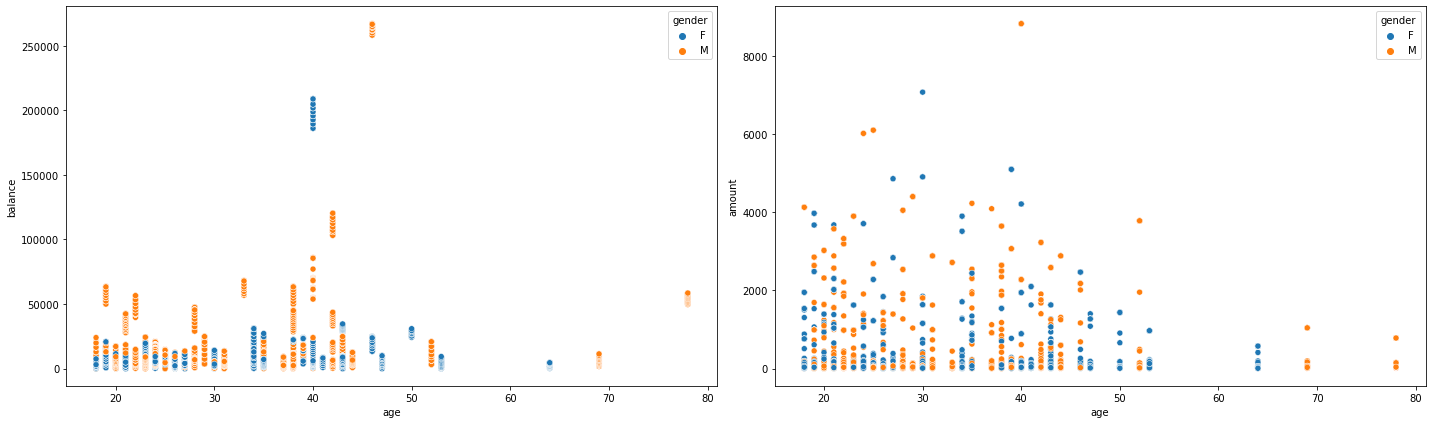

In [9]:
fig, ax = plt.subplots(1,2,figsize=(20,6))
sns.scatterplot(x=anz.age, y=anz.balance,ax = ax[0],hue=anz.gender)
sns.scatterplot(x=anz.age, y=anz.amount, ax= ax[1],hue=anz.gender)
plt.tight_layout()

- Balance: As we can see the above plot, Balance is high for thr Age group between 26 and 40. and gradualy decrease with age.
- Amount: Amount distribution is high in the age group till 45 (Also becasue of working Class belongs to particular age group). Expenses are less for the age group above 50

<font color=blue> <b>  Describing Transaction details Volume

In [7]:
anz['txn_description'].value_counts()

SALES-POS     3934
POS           3783
PAYMENT       2600
PAY/SALARY     883
INTER BANK     742
PHONE BANK     101
Name: txn_description, dtype: int64

Maximum Trasaction are done on SALES-POS and POS.

<font color=blue> <b> Transaction Volume per Day

In [8]:
anz['date'].value_counts()

2018-09-28    174
2018-08-17    172
2018-10-05    168
2018-10-17    162
2018-09-14    161
             ... 
2018-08-06     99
2018-08-20     97
2018-10-23     96
2018-10-08     95
2018-10-30     89
Name: date, Length: 91, dtype: int64

<font color=blue> <b> Total No. of Transaction For Each Customer

In [9]:
anz['customer_id'].value_counts()

CUS-2487424745    578
CUS-2142601169    303
CUS-3026014945    292
CUS-3378712515    260
CUS-1614226872    259
                 ... 
CUS-3395687666     40
CUS-3201519139     37
CUS-1646183815     34
CUS-495599312      31
CUS-1739931018     25
Name: customer_id, Length: 100, dtype: int64

<font color=blue> <b>  Creating a new Column for Weekdayand Month
- Converting a Date Colum to Datetime and Spliting the Weekday and Month to New Column

In [14]:
# Converting to Datetime Data Type
anz['date'] = pd.to_datetime(anz['date'])
anz['week_day'] = anz['date'].dt.day_name()
anz['month'] = anz['date'].dt.month_name()

<font color=blue> <b> Visualizing Average Transaction Volume per day and Daily Transaction Volumes

Average Transation volume is  132.34 AUD


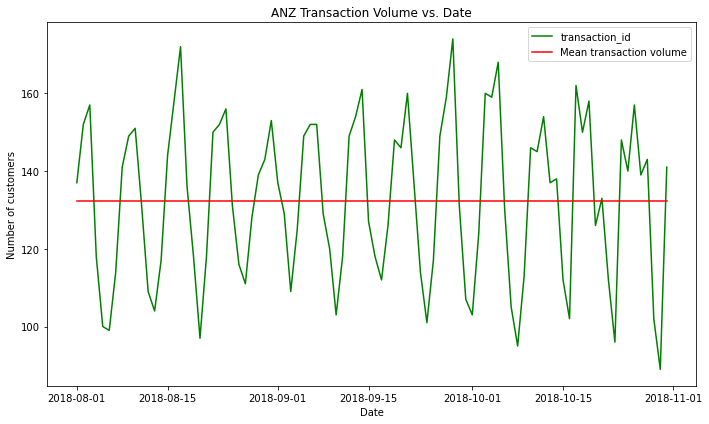

In [15]:
# Grouping the Data by Date
anz_date_count = anz.groupby("date").count()

# Mean Transaction Volume per day
trans_vol = anz_date_count["customer_id"].mean()
n_points = len(anz_date_count.index)

# Visualizing the Transaction Volume
plt.figure(figsize=(10,6))
plt.plot(anz_date_count.index, anz_date_count["transaction_id"], c="Green", label = "transaction_id")
plt.plot(anz_date_count.index, np.linspace(trans_vol,trans_vol,n_points), c="r", label = "Mean transaction volume")
plt.title("ANZ Transaction Volume vs. Date")
plt.xlabel("Date")
plt.ylabel("Number of customers")
plt.legend()
plt.tight_layout()
print('Average Transation volume is ',np.round(trans_vol,2), 'AUD')

<font color=blue> <b> Visualizing Average Transaction Amlunt per day and Daily Transaction Amount

Average Transation amount is  190.61 AUD


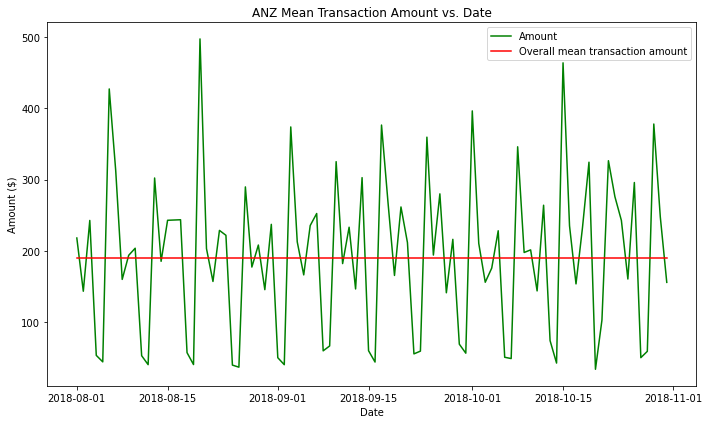

In [16]:
# Grouping the Data By Date
anz_date_mean = anz.groupby("date").mean()

# Transaction Amount per day
trans_amt = anz_date_mean["amount"].mean()
n_points = len(anz_date_count.index)


# Visualizing the transaction Amount
plt.figure(figsize=(10,6))
plt.plot(anz_date_count.index, anz_date_mean["amount"], c="Green", label = "Amount")
plt.plot(anz_date_count.index, np.linspace(trans_amt,trans_amt,n_points), c="r", label = "Overall mean transaction amount")
plt.title("ANZ Mean Transaction Amount vs. Date")
plt.xlabel("Date")
plt.ylabel("Amount ($)")
plt.legend()
plt.tight_layout()
print('Average Transation amount is ',np.round(trans_amt,2), 'AUD')

Analysis: 
- Some Day The tansaction Volume and Amount is below the the average level, likely because of weeknds or public holidays.
- There are days where there is high frequency of Transaction in terms of volume and Amount. We will firther drill down on the basis of Week days to see the days with Higher Transactions.

<font color=blue> <b> Month Wise Average Transaction by Volume and Amount

Average Transation count for Auguest is  3943
Average Transation count for September is  4013
Average Transation count for October is  4087
Average Transation count for all three month is  4014.0


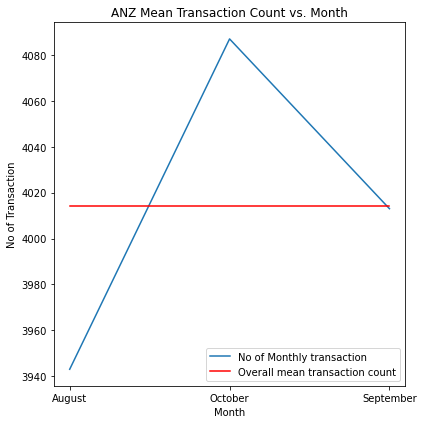

In [17]:
# Monthwise Average transaction by Volume

#Grouping the Data by Month
anz_month_count = anz.groupby("month").count().reset_index()

#Average Transaction Byvolue
trans_vol2 = anz_month_count["transaction_id"].mean()
n_points3 = len(anz_month_count.index)


#Visualization of Transaction by Volume
plt.figure(figsize=(6,6))
plt.plot(anz_month_count.month, anz_month_count["transaction_id"],label ="No of Monthly transaction")
plt.plot(anz_month_count.month, np.linspace(trans_vol2,trans_vol2,n_points3), c="r", label = "Overall mean transaction count")
plt.title("ANZ Mean Transaction Count vs. Month")
plt.xlabel("Month")
plt.ylabel("No of Transaction")
plt.legend()
plt.tight_layout()
print('Average Transation count for Auguest is ',np.round(anz_month_count[anz_month_count['month']=='August']['transaction_id'].iloc[0],2))
print('Average Transation count for September is ',np.round(anz_month_count[anz_month_count['month']=='September']['transaction_id'].iloc[0],2))
print('Average Transation count for October is ',np.round(anz_month_count[anz_month_count['month']=='October']['transaction_id'].iloc[0],2))
print('Average Transation count for all three month is ',np.round((trans_vol2)))

Average Transation Amount for Auguest is  185.12 AUD
Average Transation Amount for September is  182.05 AUD
Average Transation Amount for October is  196.43 AUD
Average Transation Amount is  187.87 AUD


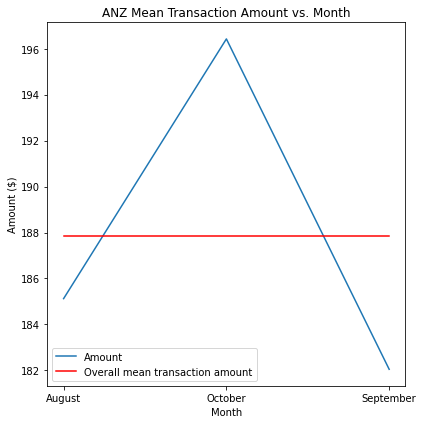

In [19]:
# Month Wise Average Transaction by Amount

# Grouping the Data By month
anz_month_mean = anz.groupby("month").mean().reset_index()

# month wise  Tranction By Amount
trans_amt2 = anz_month_mean["amount"].mean()
n_points2 = len(anz_month_count.index)

#Visualization of Transaction by Amount
plt.figure(figsize=(6,6))
plt.plot(anz_month_mean.month, anz_month_mean["amount"], label = "Amount")
plt.plot(anz_month_mean.month, np.linspace(trans_amt2,trans_amt2,n_points2), c="r", label = "Overall mean transaction amount")
plt.title("ANZ Mean Transaction Amount vs. Month")
plt.xlabel("Month")
plt.ylabel("Amount ($)")
plt.legend()
plt.tight_layout()
print('Average Transation Amount for Auguest is ',np.round(anz_month_mean[anz_month_mean['month']=='August']['amount'].iloc[0],2),'AUD')
print('Average Transation Amount for September is ',np.round(anz_month_mean[anz_month_mean['month']=='September']['amount'].iloc[0],2),'AUD')
print('Average Transation Amount for October is ',np.round(anz_month_mean[anz_month_mean['month']=='October']['amount'].iloc[0],2),'AUD')
print('Average Transation Amount is ',np.round(trans_amt2,2), 'AUD')

Analysis: 
- August has lowest Transaction interms of Volume.
- September has lowest Transaction by Amount.
- October has highest Transaction by volume and amount

<font color=blue> <b> Weekday wise Average Transaction by Volume and Amount

Average Transation Amount for Monday is  373.22 AUD
Average Transation Amount for Tuesday is  221.58 AUD
Average Transation Amount for Wednesday is  195.22 AUD
Average Transation Amount for Thursday is  184.01 AUD
Average Transation Amount for Friday is  249.35 AUD
Average Transation Amount for Saturday is  54.42 AUD
Average Transation Amount for Sunday is  53.02 AUD
Average Transation Amount is  190.12 AUD


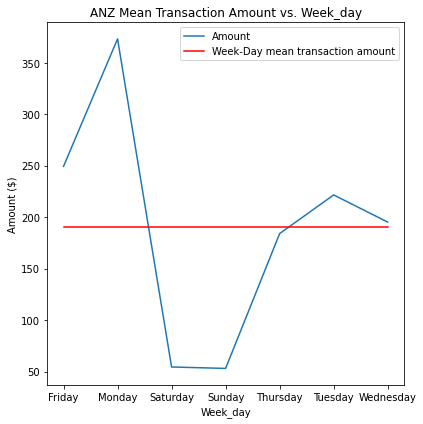

In [20]:
# Weekday wise Transaction by Amount

# Grouping the Data by Weekdays
anz_week_Day_mean = anz.groupby("week_day").mean().reset_index()

# Transaction Amount on Weekday basis
trans_amt2 = anz_week_Day_mean["amount"].mean()
n_points2 = len(anz_week_Day_mean.index)

# Visualizing the Weekday wise transaction Amount
plt.figure(figsize=(6,6))
plt.plot(anz_week_Day_mean.week_day,anz_week_Day_mean["amount"], label = "Amount")
plt.plot(anz_week_Day_mean.week_day,np.linspace(trans_amt2,trans_amt2,n_points2), c="r", label = "Week-Day mean transaction amount")
plt.title("ANZ Mean Transaction Amount vs. Week_day")
plt.xlabel("Week_day")
plt.ylabel("Amount ($)")
plt.legend()
plt.tight_layout()
print('Average Transation Amount for Monday is ',np.round(anz_week_Day_mean[anz_week_Day_mean['week_day']=='Monday']['amount'].iloc[0],2),'AUD')
print('Average Transation Amount for Tuesday is ',np.round(anz_week_Day_mean[anz_week_Day_mean['week_day']=='Tuesday']['amount'].iloc[0],2),'AUD')
print('Average Transation Amount for Wednesday is ',np.round(anz_week_Day_mean[anz_week_Day_mean['week_day']=='Wednesday']['amount'].iloc[0],2),'AUD')
print('Average Transation Amount for Thursday is ',np.round(anz_week_Day_mean[anz_week_Day_mean['week_day']=='Thursday']['amount'].iloc[0],2),'AUD')
print('Average Transation Amount for Friday is ',np.round(anz_week_Day_mean[anz_week_Day_mean['week_day']=='Friday']['amount'].iloc[0],2),'AUD')
print('Average Transation Amount for Saturday is ',np.round(anz_week_Day_mean[anz_week_Day_mean['week_day']=='Saturday']['amount'].iloc[0],2),'AUD')
print('Average Transation Amount for Sunday is ',np.round(anz_week_Day_mean[anz_week_Day_mean['week_day']=='Sunday']['amount'].iloc[0],2),'AUD')
print('Average Transation Amount is ',np.round(trans_amt2,2), 'AUD')

Average Transation Volume for Monday is  1360
Average Transation Volume for Tuesday is  1487
Average Transation Volume for Wednesday is  2063
Average Transation Volume for Thursday is  1801
Average Transation Volume for Friday is  2073
Average Transation Volume for Saturday is  1709
Average Transation Volume for Sunday is  1550
Average Transation Volume is  1720.43


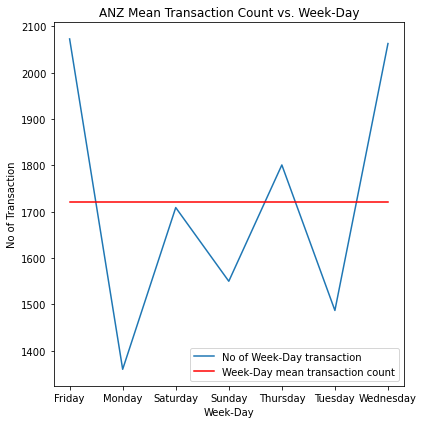

In [22]:
# Weekday wise Transction by volume

#  Grouping the Data by weekday
anz_week_Day_count = anz.groupby("week_day").count().reset_index()

# Transaction by Volume
trans_vol2 = anz_week_Day_count["transaction_id"].mean()
n_points3 = len(anz_week_Day_count.index)

#Visualizing the Weekday wise Transaction by volume
plt.figure(figsize=(6,6))
plt.plot(anz_week_Day_count.week_day, anz_week_Day_count["transaction_id"],label ="No of Week-Day transaction")
plt.plot(anz_week_Day_count.week_day, np.linspace(trans_vol2,trans_vol2,n_points3), c="r", label = "Week-Day mean transaction count")
plt.title("ANZ Mean Transaction Count vs. Week-Day")
plt.xlabel("Week-Day")
plt.ylabel("No of Transaction")
plt.legend()
plt.tight_layout()
print('Average Transation Volume for Monday is ',np.round(anz_week_Day_count[anz_week_Day_count['week_day']=='Monday']['amount'].iloc[0],2))
print('Average Transation Volume for Tuesday is ',np.round(anz_week_Day_count[anz_week_Day_count['week_day']=='Tuesday']['amount'].iloc[0],2))
print('Average Transation Volume for Wednesday is ',np.round(anz_week_Day_count[anz_week_Day_count['week_day']=='Wednesday']['amount'].iloc[0],2))
print('Average Transation Volume for Thursday is ',np.round(anz_week_Day_count[anz_week_Day_count['week_day']=='Thursday']['amount'].iloc[0],2))
print('Average Transation Volume for Friday is ',np.round(anz_week_Day_count[anz_week_Day_count['week_day']=='Friday']['amount'].iloc[0],2))
print('Average Transation Volume for Saturday is ',np.round(anz_week_Day_count[anz_week_Day_count['week_day']=='Saturday']['amount'].iloc[0],2))
print('Average Transation Volume for Sunday is ',np.round(anz_week_Day_count[anz_week_Day_count['week_day']=='Sunday']['amount'].iloc[0],2))
print('Average Transation Volume is ',np.round(trans_vol2,2))

Analysis:
- Monday has lowest transaction Count but the highest Transaction Volume. It is likely due to Pay/Salary credit mostly on Monday.
- Friday and Wednesday have High number of Tranasaction by Volume and Amount as compare to Average. Ot is likely Due to weekend Starts from Fraiday Eve and also due to mid week gorceries buying on wednesday.
- Saturtday and Sunday has high Transaction count by Low Transaction amount. Likely because of Samll smount transaction.

<font color=blue> <b> Proportion of Types of Transactions

The Type Transaction Done by Customers are: 
SALES-POS     3934
POS           3783
PAYMENT       2600
PAY/SALARY     883
INTER BANK     742
PHONE BANK     101
Name: txn_description, dtype: int64


<AxesSubplot:ylabel='txn_description'>

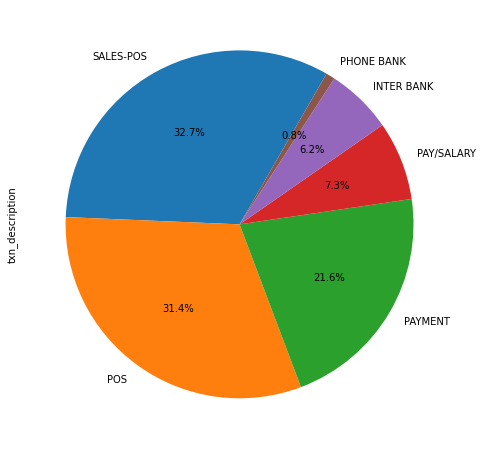

In [25]:
plt.figure(figsize=(8,8))
print("The Type Transaction Done by Customers are: ")
print(anz['txn_description'].value_counts())
anz['txn_description'].value_counts().plot.pie(autopct='%1.1f%%', startangle=60)

Analysis:
- SALES_POS and POS has the highest no. of transaction  types.
- Custoemrs are very less inclined towards Phone Banking Services.


<font color=blue> <b> Merchant Wise Transaction Details

NSW    2169
VIC    2131
QLD    1556
WA     1100
SA      415
NT      205
ACT      73
TAS      68
Name: merchant_state, dtype: int64


<AxesSubplot:ylabel='merchant_state'>

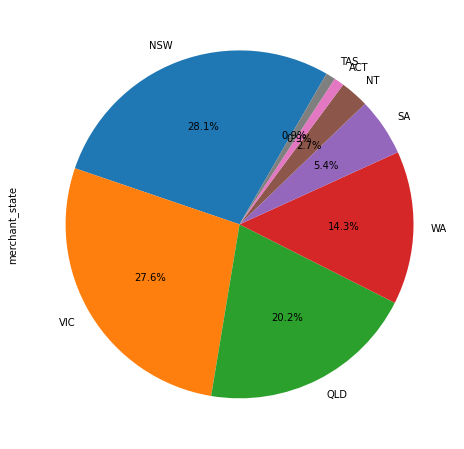

In [26]:
plt.figure(figsize=(8,8))
print(anz['merchant_state'].value_counts())
explode=(0.1,0.05,0.05)
anz['merchant_state'].value_counts().plot.pie(autopct='%1.1f%%', startangle=60)

Analysis: New South Wale and Victoria were the State with Maximum no. of Transaction, followed by Queensland.

<font color=blue> <b> Top 5 POS and Sales-POS Transacting Customer

The top 5 Cusotmers with SALES_POS and POS transaction are: 


,first_name,customer_id,transaction_id
21,Diana,CUS-2487424745,531
65,Michael,CUS-2142601169,276
96,Tonya,CUS-3026014945,248
75,Rhonda,CUS-1614226872,220
36,Jeffrey,CUS-860700529,206


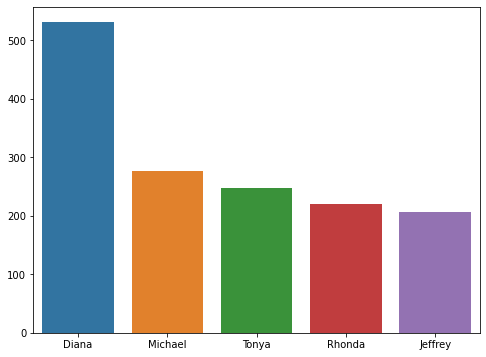

In [33]:
# Subsetting the Data on the basis of POS And SALES_POS transaction and Grouping the data by Fist name And Custiomer_id
x = anz[(anz['txn_description']=='POS') | (anz['txn_description']=='SALES-POS')].groupby(['first_name','customer_id'])['transaction_id'].count()

# Converting Into DataFrame
x = pd.DataFrame(x,columns=['transaction_id']).reset_index()

# Sorting the Data in Descending Order and Filtering the top Customers
x = x.sort_values('transaction_id',ascending=False).head(5)

# Visualizing the Customer Transaction Frequency
plt.figure(figsize=(8,6))
sns.barplot(x=x['first_name'].values, y=x['transaction_id'].values,)
print("The top 5 Cusotmers with SALES_POS and POS transaction are: ")
x


<font color=blue> <b> Top 5 Customers Transcating State Summary along with their Balance and Salary

In [36]:
anz_POS =  anz[(anz['txn_description']=='POS') | (anz['txn_description']=='SALES-POS')]
customer_id=x['customer_id']
customer=anz_POS[anz_POS['customer_id']==customer_id.iloc[0]]
for cid in customer_id:
    #subsetting the data based custid
    customer=anz_POS[anz_POS['customer_id']==cid]
    #print(cid)
    # grouping the customer data on the basis state
    cust_by_state = customer.groupby(['merchant_state', 'first_name']).size().to_frame('count').reset_index()
    # Total transction Done by cusomter on POS and Sales-POS in last 3 months
    trxn = x[x['customer_id']== cid]['transaction_id'].iloc[0]
    # Total amount spend on all location on POS and SALE-POS
    tot_amt = np.round(customer['amount'].sum(),2)
    # state with maximum with no. of transaction
    most_no_pos_trxn = cust_by_state.sort_values('count', ascending=False).head(1)
    # amount of shopping done in state with maximum transaction
    amt = customer[customer['merchant_state']==most_no_pos_trxn['merchant_state'].iloc[0]]['amount'].sum()
    #total salary credited in last 3 months
    sal_tot = anz[(anz['customer_id']==cid) & (anz['txn_description']=='PAY/SALARY')]['amount'].sum()
    # Average Balance for last 3 months
    avg_bal = np.round(anz[(anz['customer_id']==cid)]['balance'].mean(),2)
    
    
    print(f"The total no of POS and Sales-POS transaction done by {customer['first_name'].iloc[0]} is {trxn} amounting to {tot_amt}")
    print(f"The customer {customer['first_name'].iloc[0]} has shopped in {most_no_pos_trxn['merchant_state'].iloc[0]} a number of {most_no_pos_trxn['count'].iloc[0]} times amounting to {np.round(amt,2)}.")
    print(f"The total salary credited for {customer['first_name'].iloc[0]} in last 3 months is {np.round(sal_tot,2)}")
    print(f"The Average Balance maintained by {customer['first_name'].iloc[0]} in last 3 months is {avg_bal}")
    
    # Checking if the Total Amount Spentis more than Avg Balance Amount
    if avg_bal <= tot_amt:
        inter_bank = anz[(anz['customer_id']==cid) & (anz['txn_description']=='INTER BANK')]['amount'].sum()
        print(f"Customer is transfering {inter_bank} to other bank, even after utilising our card for maximum shoping through POS and Sales-POS")
        print(f"{customer['first_name'].iloc[0]}, is eroder customer.")
        print(f"we should engage with {customer['first_name'].iloc[0]} for attachments to retain money in our bank to increase average balance in account")
    print('\n')

The total no of POS and Sales-POS transaction done by Diana is 531 amounting to 9819.21
The customer Diana has shopped in QLD a number of 444 times amounting to 7281.97.
The total salary credited for Diana in last 3 months is 14191.38
The Average Balance maintained by Diana in last 3 months is 1735.12
Customer is transfering 536.0 to other bank, even after utilising our card for maximum shoping through POS and Sales-POS
Diana, is eroder customer.
we should engage with Diana for attachments to retain money in our bank to increase average balance in account


The total no of POS and Sales-POS transaction done by Michael is 276 amounting to 9685.76
The customer Michael has shopped in NSW a number of 227 times amounting to 8822.13.
The total salary credited for Michael in last 3 months is 13027.69
The Average Balance maintained by Michael in last 3 months is 1191.29
Customer is transfering 0.0 to other bank, even after utilising our card for maximum shoping through POS and Sales-POS
Michae